# Feedforward Networks & Physics-Informed Neural Networks (PINNs)

This notebook demonstrates how to build **data-driven feedforward networks** and **Physics-Informed Neural Networks (PINNs)** using Python and **PyTorch**, making use of the code developed during the master thesis: "Physics-Informed Neural Networks for Aerospace Applications", by Tristan Hirs. 

In this tutorial, you will learn:
- How to create feedforward networks for regression tasks.
- The downsides of feedforward networks.
- How to incorporate physics-based constraints into neural networks.
- The difference between traditional neural networks and PINNs.

## Neural Networks in a Nutshell

Nowadays, **AI** and **neural networks** are terms you hear everywhere. But what exactly are they, and why are they so important?

At their core, **Neural Networks** are a type of machine learning model inspired by the human brain. They consist of interconnected layers of nodes, also known as neurons, which process and learn from data. Through training, neural networks can identify patterns, make predictions, and even generate new data.

The reason neural networks have become so popular is their ability to handle vast amounts of data and solve complex problems in areas like computer vision, natural language processing, and autonomous driving. With advancements in computing power and access to large datasets, neural networks are becoming increasingly powerful and are at the forefront of AI research and applications.

In this notebook, we will explore the fundamentals of neural networks, from simple feedforward networks to more advanced architectures like **Physics-Informed Neural Networks (PINNs)**, which integrate physical laws directly into the model's learning process.




### What is a PINN?

A **Physics-Informed Neural Network (PINN)** is a type of neural network that integrates **physical laws** directly into the model's loss function. This allows the network to not only learn from the data but also ensure that its predictions are consistent with known physical principles, such as conservation laws, differential equations, and boundary conditions.

The key difference between a standard neural network and a PINN is the incorporation of **physics-based constraints**. In traditional machine learning, the model's training focuses solely on minimizing the error between predicted outputs and observed data. In contrast, a PINN simultaneously minimizes this error **and** enforces physical constraints to make the model more accurate and reliable when solving real-world problems, particularly in physics and engineering.

### How Does a PINN Work?
1. **Loss Function**: A PINN’s loss function consists of two components:
   - The **data loss** term, which is the standard loss function (e.g., mean squared error) that measures the difference between the model’s predictions and actual data.
   - The **physics loss** term, which enforces the model to obey physical laws (e.g., by incorporating residuals of governing equations like the Navier-Stokes equations or Maxwell’s equations).
   
2. **Training Process**: During training, the model is adjusted to minimize both data loss and physics loss simultaneously, ensuring that the learned function is both accurate and physically consistent.

### Applications of PINNs:
PINNs are particularly useful in solving complex problems in fields like:
- **Fluid dynamics** (e.g., simulating airflow or water flow).
- **Heat transfer** (e.g., modeling temperature distribution).
- **Structural mechanics** (e.g., predicting stress and strain in materials).
- **Electromagnetics** (e.g., simulating electromagnetic fields).

PINNs have been shown to provide accurate solutions even with sparse or noisy data by utilizing the power of **physics-driven learning**.

By combining the flexibility of neural networks with the rigor of physical laws, PINNs offer a powerful tool for solving forward and inverse problems in scientific computing.




# Feedforward Neural Networks

A **Feedforward Neural Network (FFNN)** is one of the simplest types of neural network architectures, and it's often used for tasks like regression and classification. In a feedforward network, information flows in a single direction — from the input layer, through any hidden layers, and finally to the output layer. There are no cycles or loops in the network, hence the term "feedforward."

The basic structure of a feedforward network includes:

1. **Input Layer**: This is where the data enters the network. Each node in this layer represents one feature of the input data.
2. **Hidden Layers**: These layers are where the network processes the data. The number of hidden layers and the number of neurons in each layer are hyperparameters that can be adjusted. Each neuron performs a weighted sum of its inputs and applies an activation function (like ReLU or Sigmoid) to produce an output.
3. **Output Layer**: The output layer produces the final predictions or classifications. The number of neurons in this layer depends on the type of task — for example, one neuron for binary classification or multiple neurons for multi-class classification.

Feedforward networks are typically trained using **backpropagation**, where the weights are adjusted to minimize the difference between the predicted output and the true output. This is achieved through gradient descent or its variants.

Although simple, FFNNs can model complex patterns in data, and they serve as the foundation for more advanced architectures like **Convolutional Neural Networks (CNNs)** and **Recurrent Neural Networks (RNNs)**.

But enough theory for now, it is time to code!

Firstly, some modules needs to be **imported** to be able to easily generate a network.

In [4]:
# Imported modules
from NN_tools_thesis import NN # This module opens the feedforward neural network generator
from Validation_class import prep_data_cooling, prep_data_surrogate # This module imports a class which helps with data generation and preparation
import matplotlib.pyplot as plt # This module creates plots to show the results
import torch.nn as nn # Used for changes in activation functions and initialization methods
import torch
import numpy as np

Now that the most important modules have been imported, it is time to start with the first example! Imagine you have a cup of hot water and would like to know how long it takes before you can lift the cup without burning your hands. To do so, a neural network can be trained to answer this question. 

First, some experimental data will be imported and shown to show how such a general process looks like. The data will be imported in terms of features and labels for the training process. The feature will, in this case, be *Time* (in seconds), and the corresponding label will be *Temperature* (in degrees Celsius).
(This experimental dataset has been measured during the master thesis "Physics-Informed Neural Networks for Aerospace Applications" by Tristan Hirs.)



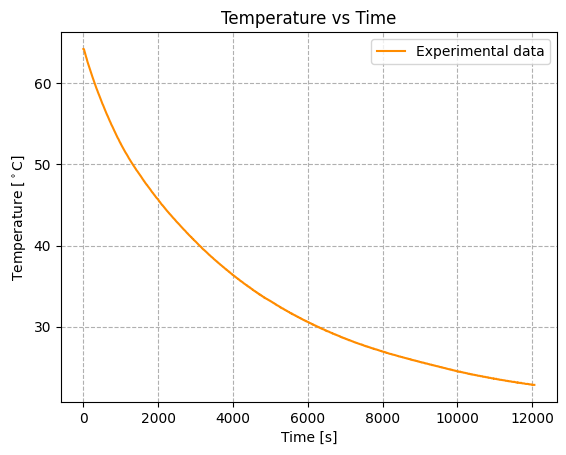

In [6]:
# Open file location directory
data_dir = "/Users/tristanhirs/Downloads/Thesis/Jupiter_notebook_tutorial/Data_single"

# Open data
X_labels, y_features, _, _,_ = prep_data_cooling(data_dir).compare_with_data()


# Create new figure
plt.figure()

# Plot data
plt.plot(X_labels, y_features, label="Experimental data", color="darkorange")

# Axis labels
plt.xlabel("Time [s]")
plt.ylabel(r'Temperature [$^\circ$C]')

# Grid
plt.grid(which='both', linestyle='--')

# Title and legend
plt.title('Temperature vs Time')
plt.legend(loc="upper right")

plt.show()


From the figure, it can be seen that the experimental data shows an exponential decay, with a limit at the enviromental temperature.

Now, it is time to setup the Neural Network and train it!

In [8]:
# Setup Neural Network
Cooling_FNN = NN(1, 1, 64, 4, epochs=20000, lr=1e-4, activation_fn=nn.ReLU, init_method=nn.init.xavier_uniform_)

### But What Does This All Mean?

The **Feedforward Neural Network (NN)** is a class that has been created to easily set up and train a feedforward neural network.

- The first input represents the number of neurons in the input layer, which corresponds to the number of input features. In this case, since only *Time* is provided as input, there is only 1 neuron in the input layer. 
- The second input corresponds to the number of neurons in the output layer, which represents the number of outputs the network will produce. Since only *Temperature* is being predicted, there is just 1 neuron in the output layer.
- Next, the number of neurons in the hidden layer(s) and the number of hidden layers are specified. The more hidden neurons and layers, the more complex patterns the network can potentially learn, but this also increases the risk of overfitting.
- The **number of epochs** determines how many times the entire training dataset will be passed through the network before the training stops. An epoch refers to one complete cycle through the entire dataset, during which the network updates its weights after processing all the data.
- The **learning rate** controls how quickly the network adjusts its weights during training. If the learning rate is set too high, the network may "overshoot" the optimal solution, causing it not to converge. If the learning rate is too low, the network may take too long to reach the optimal point and might not finish training within the desired number of epochs.
- Lastly, the **activation function** is chosen for the hidden layers. This function determines how the weighted sum of the inputs to a neuron is transformed into an output. This is needed to introduce non-linearity into the network. It needs to be selected carefully to ensure the network can represent the complexity of the problem. Common activation functions include ReLU (Rectified Linear Unit), Sigmoid, and Tanh, each with different properties that make them more or less suited to specific tasks.


Now, it is time to setup the training sequance. First, some training data will be selected from the experimental data in a unifrom way.

Training data
Training data shape (X_train): (500,)
Training labels shape (y_train): (500,)
Validation data
Validation data shape (X_val): (100,)
Validation labels shape (y_val): (100,)


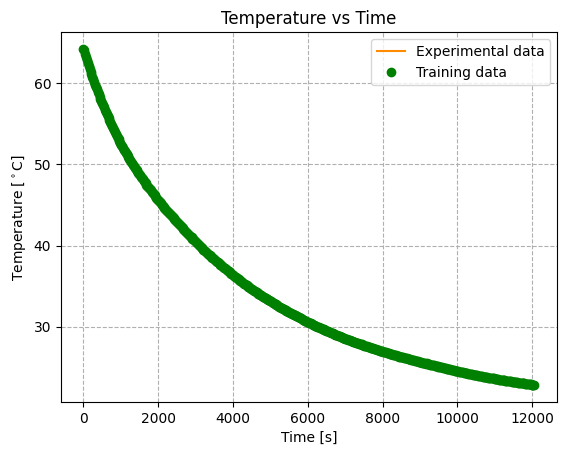

In [11]:
# Sample training data uniformly from the experimental data
X_train, y_train, _, _ = prep_data_cooling(data_dir, n_outputs=1, n_samples=500, start_time=None, end_time=None).train_val_split(comb_data=True)

# Plot results
# Create new figure
plt.figure()

# Plot data
plt.plot(X_labels, y_features, label="Experimental data", color="darkorange")
plt.plot(X_train, y_train, 'o', label="Training data", color="green")

# Axis labels
plt.xlabel("Time [s]")
plt.ylabel(r'Temperature [$^\circ$C]')


# Grid
plt.grid(which='both', linestyle='--')

# Title and legend
plt.title('Temperature vs Time')
plt.legend(loc="upper right")

plt.show()







Now, a total of 10 samples have been unifromly drawn over the domain. It is time to train!

Epoch 0/20000, Train cost: 66505.2734
Epoch 2000/20000, Train cost: 436.2091
Epoch 4000/20000, Train cost: 55.9444
Epoch 6000/20000, Train cost: 1.0898
Epoch 8000/20000, Train cost: 0.0808
Epoch 10000/20000, Train cost: 19.4428
Epoch 12000/20000, Train cost: 9.3464
Epoch 14000/20000, Train cost: 0.0592
Epoch 16000/20000, Train cost: 37.1568
Epoch 18000/20000, Train cost: 0.5651


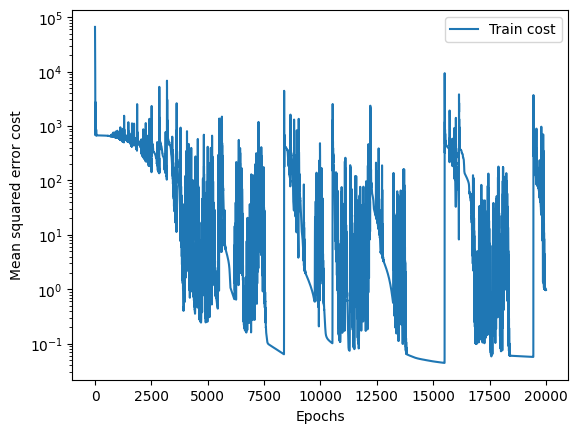

([66505.2734375,
  57703.12109375,
  49776.68359375,
  42281.609375,
  35600.21484375,
  29671.7734375,
  24371.615234375,
  19705.099609375,
  15589.728515625,
  12030.1083984375,
  9049.0224609375,
  6595.1787109375,
  4624.03076171875,
  3109.56640625,
  2013.72119140625,
  1275.3477783203125,
  848.2525634765625,
  681.5296630859375,
  718.7057495117188,
  901.2420043945312,
  1178.5458984375,
  1504.09765625,
  1837.409912109375,
  2145.444091796875,
  2403.32373046875,
  2594.52880859375,
  2710.20703125,
  2748.53271484375,
  2713.589111328125,
  2613.99755859375,
  2461.569091796875,
  2269.96337890625,
  2053.4931640625,
  1826.1014404296875,
  1600.5118408203125,
  1387.64794921875,
  1196.165771484375,
  1035.2117919921875,
  899.2376098632812,
  798.7380981445312,
  729.7940673828125,
  689.7498168945312,
  674.5870361328125,
  679.3758544921875,
  698.729736328125,
  727.2345581054688,
  759.82275390625,
  792.0767211914062,
  820.4435424804688,
  842.3539428710938,
  856.

In [13]:
# After running this cell, the network will train. This could take some time!

# Train network
Cooling_FNN.fit(X_train, y_train)

Now the network has been trained, let's compare the results

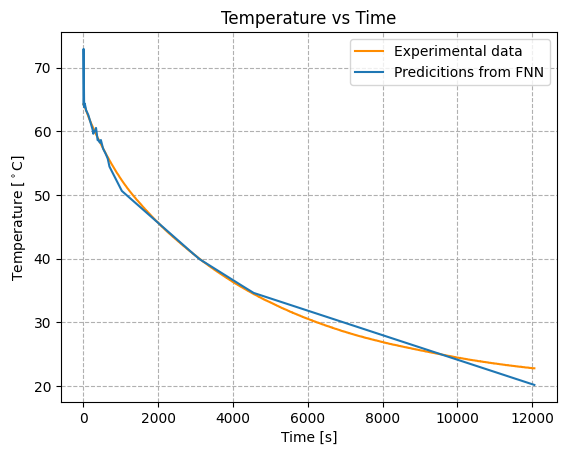

Average error: 1.000514 [deg C]
Max error: 8.671227 [deg C]


In [15]:
# Obtain average RMSE and maximum error
time_true, _, predictions, error_average, error_max = prep_data_cooling(data_dir, n_outputs=1, n_samples=1e6, start_time=None, end_time=None).compare_with_data(Cooling_FNN.predict)

# Create new figure
plt.figure()

# Plot data
plt.plot(X_labels, y_features, label="Experimental data", color="Darkorange")
#plt.plot(X_train, y_train, 'o', label="Training data", color="green")
plt.plot(time_true, predictions, label="Predicitions from FNN")

# Axis labels
plt.xlabel("Time [s]")
plt.ylabel(r'Temperature [$^\circ$C]')


# Grid
plt.grid(which='both', linestyle='--')

# Title and legend
plt.title('Temperature vs Time')
plt.legend(loc="upper right")

plt.show()

# Print average RMSE and max error
print(f"Average error: {error_average:f} [deg C]")
print(f"Max error: {error_max:f} [deg C]")


So let's look at the result. First it can be seen that the network works quite. However, at the start there is a very large spike, which can also be seen from the maximum error. 

To train this network, 500 training points were needed over the entire domain. What happens if we have less data points, but only starting from a certain range such as shown below:

Training data
Training data shape (X_train): (10,)
Training labels shape (y_train): (10,)
Validation data
Validation data shape (X_val): (2,)
Validation labels shape (y_val): (2,)


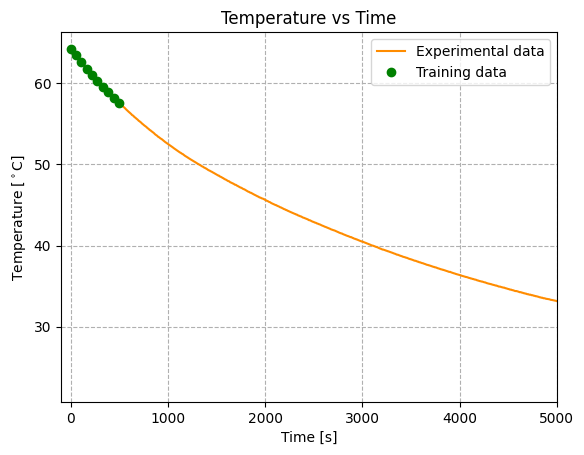

In [17]:
# Sample training data uniformly from the experimental data
X_train, y_train, _, _ = prep_data_cooling(data_dir, n_outputs=1, n_samples=10, start_time=0, end_time=500).train_val_split(comb_data=True)

# Plot results
# Create new figure
plt.figure()

# Plot data
plt.plot(X_labels, y_features, label="Experimental data", color="darkorange")
plt.plot(X_train, y_train, 'o', label="Training data", color="green")

# Axis labels
plt.xlabel("Time [s]")
plt.ylabel(r'Temperature [$^\circ$C]')

# Add limits
plt.xlim(-100, 5000)


# Grid
plt.grid(which='both', linestyle='--')

# Title and legend
plt.title('Temperature vs Time')
plt.legend(loc="upper right")

plt.show()


Now let's setup a network agin and train it to compare

In [19]:
# Setup new network
Cooling_selected_FNN = NN(1, 1, 64, 4, epochs=50000, lr=1e-5, activation_fn=nn.ReLU, init_method=nn.init.xavier_uniform_)

Epoch 0/50000, Train cost: 1752.3469
Epoch 5000/50000, Train cost: 1122.4156
Epoch 10000/50000, Train cost: 500.2479
Epoch 15000/50000, Train cost: 108.5849
Epoch 20000/50000, Train cost: 0.9244
Epoch 25000/50000, Train cost: 0.0956
Epoch 30000/50000, Train cost: 0.0051
Epoch 35000/50000, Train cost: 0.0003
Epoch 40000/50000, Train cost: 0.0003
Epoch 45000/50000, Train cost: 0.0007


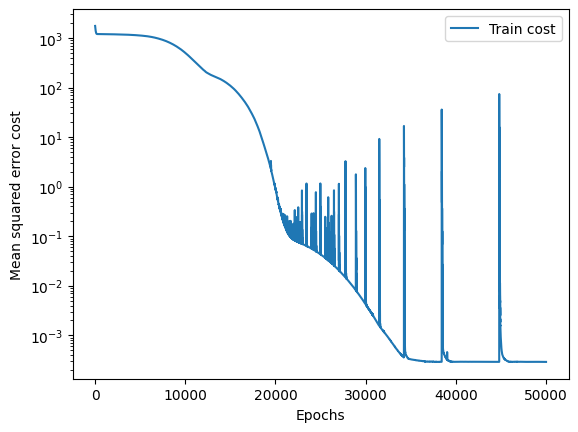

([1752.346923828125,
  1744.0699462890625,
  1735.8548583984375,
  1727.7025146484375,
  1719.617431640625,
  1711.5966796875,
  1703.642822265625,
  1695.7562255859375,
  1687.9390869140625,
  1680.191162109375,
  1672.5133056640625,
  1664.9066162109375,
  1657.4368896484375,
  1650.3212890625,
  1643.3304443359375,
  1636.3994140625,
  1629.53076171875,
  1622.72607421875,
  1615.986572265625,
  1609.313232421875,
  1602.70703125,
  1596.168212890625,
  1589.6978759765625,
  1583.2960205078125,
  1576.9627685546875,
  1570.698486328125,
  1564.50390625,
  1558.3782958984375,
  1552.322509765625,
  1546.3359375,
  1540.4190673828125,
  1534.571533203125,
  1528.793701171875,
  1523.0850830078125,
  1517.445556640625,
  1511.8753662109375,
  1506.3739013671875,
  1500.9415283203125,
  1495.5772705078125,
  1490.2813720703125,
  1485.0537109375,
  1479.8936767578125,
  1474.801025390625,
  1469.7755126953125,
  1464.817138671875,
  1459.9249267578125,
  1455.0989990234375,
  1450.33862

In [20]:
# Train network
Cooling_selected_FNN.fit(X_train, y_train)

And let's show the results

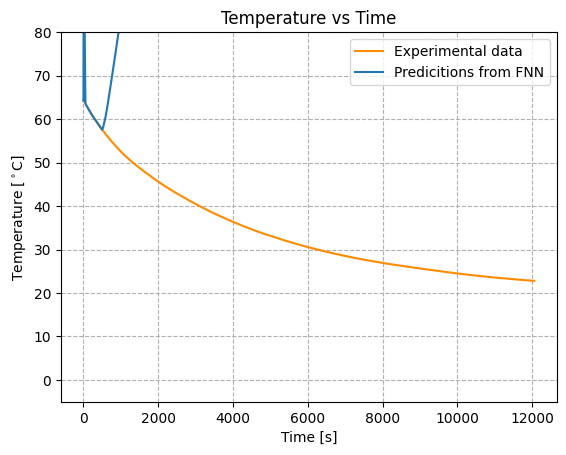

Average error: 402.603599 [deg C]
Max error: 704.523254 [deg C]


In [22]:
# Obtain average RMSE and maximum error
time_true, _, predictions, error_average, error_max = prep_data_cooling(data_dir, n_outputs=1, n_samples=1e6, start_time=None, end_time=None).compare_with_data(Cooling_selected_FNN.predict)

# Create new figure
plt.figure()

# Plot data
plt.plot(X_labels, y_features, label="Experimental data", color="Darkorange")
#plt.plot(X_train, y_train, 'o', label="Training data", color="green")
plt.plot(time_true, predictions, label="Predicitions from FNN")

# Axis labels
plt.xlabel("Time [s]")
plt.ylabel(r'Temperature [$^\circ$C]')

# Add limits
plt.ylim(-5, 80)

# Grid
plt.grid(which='both', linestyle='--')

# Title and legend
plt.title('Temperature vs Time')
plt.legend(loc="upper right")

plt.show()

# Print average RMSE and max error
print(f"Average error: {error_average:f} [deg C]")
print(f"Max error: {error_max:f} [deg C]")

Now, it can be seen that the network doesn't work outside its training domain! Furthermore, the spike at the start remains. To solve this, use can be made of PINNs. This will be incorporated in the next part of this tutorial.

# Physics-Informed Neural Networks

So now, let's introduce physics to the problem. The cooling down of objects can be described by making use of Newton's law of cooling. This is shown in the equation below:

\begin{equation}
        \frac{dT\left(t\right)}{dt} = \frac{hA}{m c_{p}} \left(T_{env} - T \left(t\right) \right)
\end{equation}

The equation from above has some constants in them, so let's initailize them here:

In [26]:
# Constants
h = 5
r = 67.7e-3/2
L = 112e-3
A = 2 * np.pi * r * L
m = 454e-3
c_p = 0.8
T_0 = 64.254
T_env = 19.1
R = ((h * A) / (m * c_p*1e3))

First let's first incorporate this equation into a suitable format. To do so, one needs to setup the function like this:

In [28]:
def example_loss_function(NN_output: torch.nn.Module, used_inputs):

    # Define your physics loss or boundary condition here
    
    return # average loss

Furthermore, a way to calculate the derivative $\frac{dT}{dt}$ needs to be incorporated, which has been done and is part of the NN tools module. However, it needs to be imported, which will be done below

In [39]:
from NN_tools_thesis import gradient

For the cooling law, the equation and boundary condtion at the start are implemented as follows:

In [59]:
# Define physics loss
def Newtons_cooling_law(NN_output: torch.nn.Module, used_inputs):
    # Setup collocation points over domain
    start, end = 0, 12e3
    steps = 300
    #Collocation_temps = torch.linspace(start, end, steps).view(-1, 1).requires_grad_(True)
    
    time_inputs = torch.linspace(start+1000, end, int((steps/10) * 5)).view(-1, 1).requires_grad_(True)
    log_space1 = torch.logspace(start=torch.log10(torch.tensor(1e-16)),end=torch.log10(torch.tensor(start+1000)),steps=int((steps/10) * 5)).view(-1,1).requires_grad_(True)
    
    
    # Concatenate with reversed version to get more density at both start and end
    Collocation_temps = torch.cat((log_space1, time_inputs), dim=0)
    
    # Obtain predictions from netwrok (outputs)
    T_predicted = NN_output(Collocation_temps)
        
    # Obtain dT/dt
    dT_dt = gradient(T_predicted, Collocation_temps)
    
    # Obtain h as learnable parameter
    #h = NN_output.h
    
    # Newton's Law of Cooling
    NLC = ((h * A) / (m * c_p*1e3)) * (T_env - T_predicted) - dT_dt

    return torch.mean(NLC**2)

# Define boundary condition starting temperature
def BC_start(NN_output: torch.nn.Module, used_inputs):
    # Setup input network (t = 0)
    time_start = torch.tensor(0.).view(-1,1).requires_grad_(True)
    
    # Obtain input temperature prediction from network
    Temp_start = NN_output(time_start)
    
    return torch.mean((Temp_start - T_0)**2)

# Add to dictionary for correct setup
loss_functions = {
    Newtons_cooling_law: 1,
    BC_start:1
}

Now, let's setup the FNN for the PINN

In [77]:
# Setup new network adding L2 as loss function
Cooling_PINN = NN(1, 1, 64, 2, epochs=100000, lr=1e-5, activation_fn=nn.ReLU, init_method=nn.init.xavier_uniform_, loss_terms=loss_functions)

Compared to the standard FNN, the NN module has an additional input called loss_terms. With this input you will be able to add certain loss functions to the total cost function of the NN module. 

Now, it is time to train the network!

Epoch 0/100000, Train cost: 7187.6206
Epoch 10000/100000, Train cost: 5142.6104
Epoch 20000/100000, Train cost: 4301.3545
Epoch 30000/100000, Train cost: 2674.7908
Epoch 40000/100000, Train cost: 927.9056
Epoch 50000/100000, Train cost: 26.7630
Epoch 60000/100000, Train cost: 0.0568
Epoch 70000/100000, Train cost: 0.0267
Epoch 80000/100000, Train cost: 0.0175
Epoch 90000/100000, Train cost: 0.0052


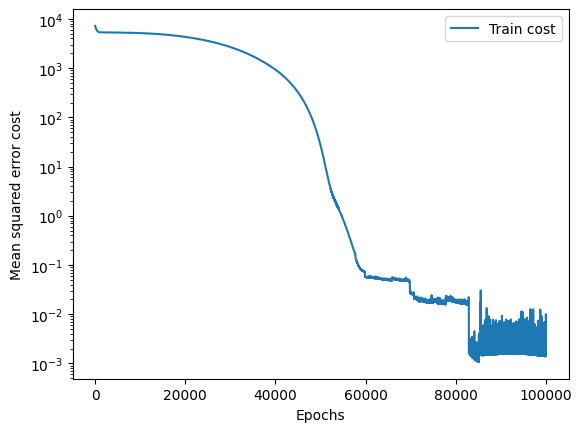

([7187.62060546875,
  7182.47314453125,
  7177.31787109375,
  7172.169921875,
  7167.0283203125,
  7161.89453125,
  7156.7666015625,
  7151.6484375,
  7146.5361328125,
  7141.43359375,
  7136.337890625,
  7131.2509765625,
  7126.1728515625,
  7121.1015625,
  7116.03857421875,
  7110.98486328125,
  7105.94140625,
  7100.90380859375,
  7095.875,
  7090.8564453125,
  7085.84716796875,
  7080.845703125,
  7075.853515625,
  7070.87109375,
  7065.89697265625,
  7060.9306640625,
  7055.9765625,
  7051.03271484375,
  7046.095703125,
  7041.1689453125,
  7036.251953125,
  7031.34375,
  7026.4443359375,
  7021.5556640625,
  7016.67578125,
  7011.806640625,
  7006.9462890625,
  7002.095703125,
  6997.2548828125,
  6992.4228515625,
  6987.603515625,
  6982.79296875,
  6977.990234375,
  6973.19921875,
  6968.41650390625,
  6963.6455078125,
  6958.8828125,
  6954.1298828125,
  6949.38671875,
  6944.654296875,
  6939.93017578125,
  6935.216796875,
  6930.5126953125,
  6925.8193359375,
  6921.13671875

In [80]:
# Train network
Cooling_PINN.fit(X_train, y_train)

And to show the results:

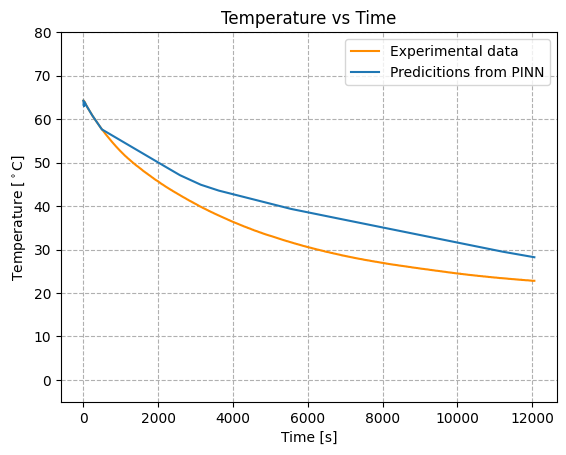

Average error: 6.495087 [deg C]
Max error: 8.329704 [deg C]


In [83]:
# Obtain average RMSE and maximum error
time_true, _, predictions, error_average, error_max = prep_data_cooling(data_dir, n_outputs=1, n_samples=1e6, start_time=None, end_time=None).compare_with_data(Cooling_PINN.predict)

# Create new figure
plt.figure()

# Plot data
plt.plot(X_labels, y_features, label="Experimental data", color="Darkorange")
#plt.plot(X_train, y_train, 'o', label="Training data", color="green")
plt.plot(time_true, predictions, label="Predicitions from PINN")

# Axis labels
plt.xlabel("Time [s]")
plt.ylabel(r'Temperature [$^\circ$C]')

# Add limits
plt.ylim(-5, 80)

# Grid
plt.grid(which='both', linestyle='--')

# Title and legend
plt.title('Temperature vs Time')
plt.legend(loc="upper right")

plt.show()

# Print average RMSE and max error
print(f"Average error: {error_average:f} [deg C]")
print(f"Max error: {error_max:f} [deg C]")

Now it can be seen that the predictions much better follow the experimental data outside the domain. However, this is dependent on the numerical model and therefore does not perfectly line up. To make this a better model, a bit more experimental data is needed. Let's try it again and see if it can be lined up better.

In [86]:
# Sample training data uniformly from the experimental data
X_train, y_train, _, _ = prep_data_cooling(data_dir, n_outputs=1, n_samples=10, start_time=None, end_time=None).train_val_split(comb_data=True)


Training data
Training data shape (X_train): (10,)
Training labels shape (y_train): (10,)
Validation data
Validation data shape (X_val): (2,)
Validation labels shape (y_val): (2,)


In [100]:
# Setup new network adding L2 as loss function
Cooling_PINN = NN(1, 1, 64, 2, epochs=200000, lr=1e-5, activation_fn=nn.ReLU, init_method=nn.init.xavier_uniform_, loss_terms=loss_functions)

Epoch 0/200000, Train cost: 238945.7344
Epoch 20000/200000, Train cost: 4669.9111
Epoch 40000/200000, Train cost: 3741.6399
Epoch 60000/200000, Train cost: 2148.1230
Epoch 80000/200000, Train cost: 498.3186
Epoch 100000/200000, Train cost: 8.4610
Epoch 120000/200000, Train cost: 5.2719
Epoch 140000/200000, Train cost: 3.0574
Epoch 160000/200000, Train cost: 1.3780
Epoch 180000/200000, Train cost: 0.2324


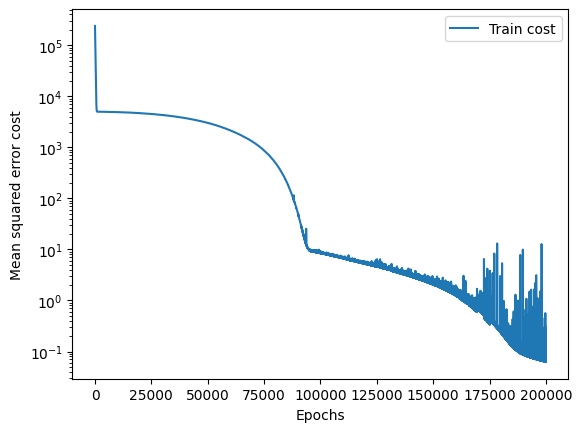

([238945.734375,
  237756.484375,
  236570.203125,
  235387.34375,
  234207.46875,
  233031.0,
  231857.6875,
  230688.0625,
  229521.96875,
  228358.921875,
  227199.375,
  226043.78125,
  224891.578125,
  223743.0,
  222598.296875,
  221457.09375,
  220319.84375,
  219186.21875,
  218056.5625,
  216930.6875,
  215808.78125,
  214690.734375,
  213576.65625,
  212466.609375,
  211360.53125,
  210258.4375,
  209160.4375,
  208066.421875,
  206976.453125,
  205890.671875,
  204808.90625,
  203731.28125,
  202657.828125,
  201588.453125,
  200523.1875,
  199462.15625,
  198405.15625,
  197352.40625,
  196303.8125,
  195259.390625,
  194219.15625,
  193182.984375,
  192151.09375,
  191123.328125,
  190099.703125,
  189080.375,
  188065.203125,
  187054.125,
  186047.140625,
  185044.421875,
  184045.78125,
  183051.390625,
  182061.09375,
  181074.828125,
  180092.796875,
  179114.890625,
  178141.078125,
  177171.359375,
  176205.71875,
  175244.125,
  174286.65625,
  173333.25,
  172383.

In [102]:
# Train network
Cooling_PINN.fit(X_train, y_train)

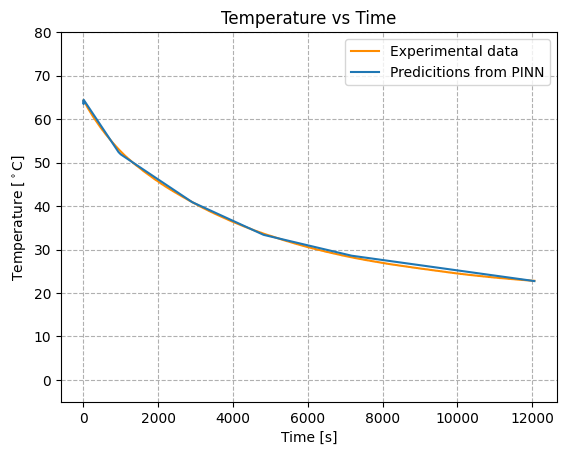

Average error: 0.457483 [deg C]
Max error: 0.796539 [deg C]


In [104]:
# Obtain average RMSE and maximum error
time_true, _, predictions, error_average, error_max = prep_data_cooling(data_dir, n_outputs=1, n_samples=1e6, start_time=None, end_time=None).compare_with_data(Cooling_PINN.predict)

# Create new figure
plt.figure()

# Plot data
plt.plot(X_labels, y_features, label="Experimental data", color="Darkorange")
#plt.plot(X_train, y_train, 'o', label="Training data", color="green")
plt.plot(time_true, predictions, label="Predicitions from PINN")

# Axis labels
plt.xlabel("Time [s]")
plt.ylabel(r'Temperature [$^\circ$C]')

# Add limits
plt.ylim(-5, 80)

# Grid
plt.grid(which='both', linestyle='--')

# Title and legend
plt.title('Temperature vs Time')
plt.legend(loc="upper right")

plt.show()

# Print average RMSE and max error
print(f"Average error: {error_average:f} [deg C]")
print(f"Max error: {error_max:f} [deg C]")

So now it can be seen that there is no strange behavor at the start of the domain, and it mostly resembles the shape of the curve. So this shows the power of PINNs by being able to generarileze bettwr compared to regylarizers or fullt FNN. However, this method can also be used solely on the physics equations, without experimental data. This will be shown in the next part of this tutorial.

## PINNs without training data

So now it is time to show a different aspect of PINNs: the possibility to train without expeirmental data, and solely on the equations. Now you probably wonder why this would be an advatnagte. Imagine you have a numerical simulation using the finite element method. The maxmimum accuracy is can not be smaller than the chosen step-size, meaning that the simulation accuracy is limited. Furthemore, a mesh needs to be created which determines where the equations will be evaluated. 

Since PINNs use collocation points, which can be drawn at random in the domain, there is no need to create a mesh. Furthermore, the accuracy of the evaluated euqation can be as precise as the accuracy of the computer, due to the computational graph created during each operation in PyTorch. 

To showcase this example, a Computational Fluid Dynamics simulation of the flow over a wing will be examined in this part of the tutorial. 

First, the domain will be set and the geometry will be imported. To do so, a helper function will be imported to ease this process.

In [111]:
from CFD_PINN_helper_functions import CFD_PINN_helpers

After this, some constants will be initialized, as well as some inputs for the simulation

In [114]:
# Constants
g_0 = 9.80665 # Gravitational acceleration [m/s2]
R_a = 8.3144 # Gas constant
P_a = 101325/1e5 # Standard pressure at sea level [pa]
rho = 1.1325 # Stnadard density of air [kg/m3]
rho = 1

# Inputs
nu = 0.01                              # Kinematic viscosity [m/s2]
u_inf = 1                              # flow speed [m/s]

# Set domain size
x_domain_size = 2
y_domain_size = 2


# Total pressure
p_inlet = P_a + ((0.5 * rho * u_inf**2)/1e5)

# Data directory
data_dir_airfoil = '/Users/tristanhirs/Downloads/Thesis/Jupiter_notebook_tutorial/seligdatfile.txt'

Now, the domain will be created

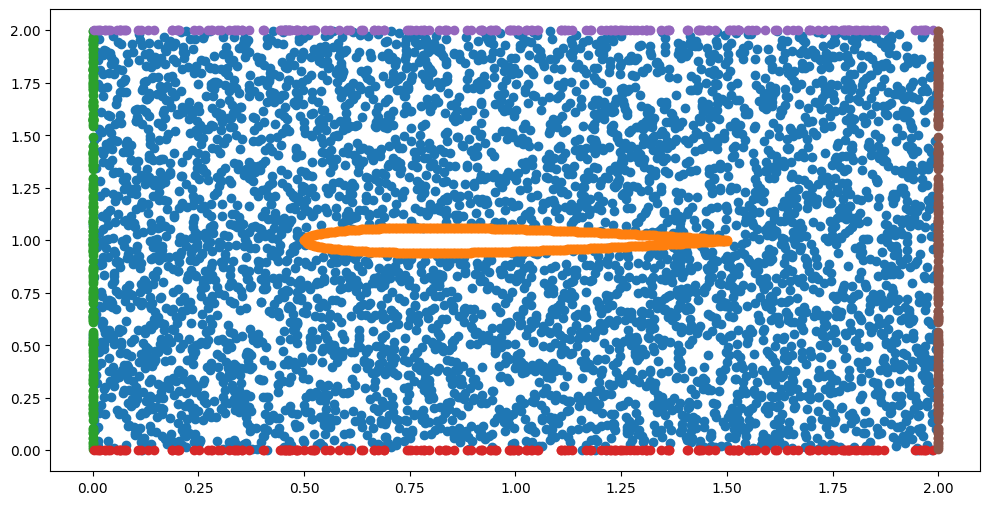

In [117]:
plot_check, points_domain, points_cylinder, points_input, points_exit, points_up, points_down = CFD_PINN_helpers(data_dir_airfoil, object_start=(0.5,1), object_angle=0, num_object_points=300, num_boundary_points=200, num_domain_points=5000).domain_and_bc_setup(x_domain_size, y_domain_size)

# Plot to check domain
plot_check.plot_domain()

So what do we see here? the blue points are the collocation points within the domain. The orange points are the boundary points of the object, in this case, an airfoil. The other points are inlet, outlet and top and bottom wall boundary points. 

Now, by changing the objects angle, a certain angle of attack can be introduced to the airfoil, which can be seen in the next figure:

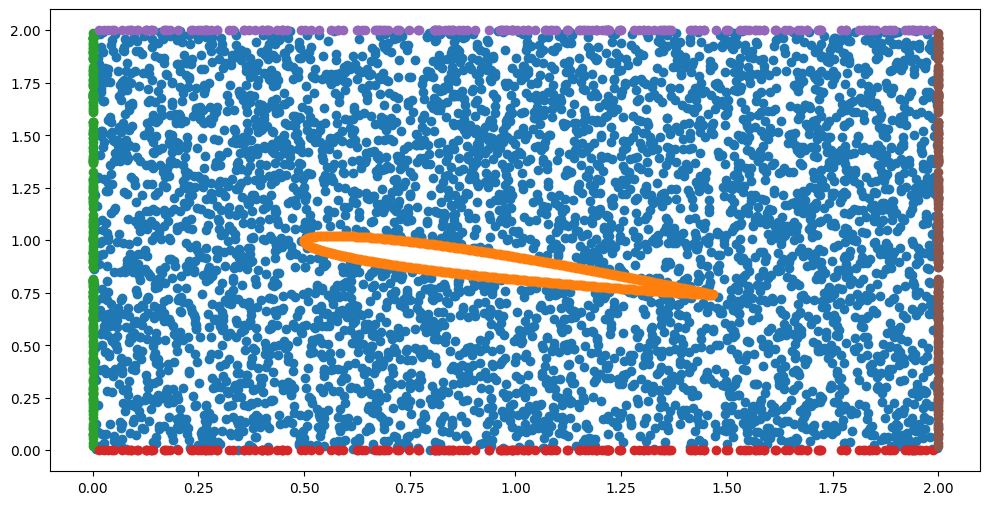

In [120]:
plot_check2, _, _, _, _, _, _ = CFD_PINN_helpers(data_dir_airfoil, object_start=(0.5,1), object_angle=-15, num_object_points=300, num_boundary_points=200, num_domain_points=5000).domain_and_bc_setup(x_domain_size, y_domain_size)

# Plot to check domain
plot_check2.plot_domain()

As can be seen, the wing rotated with a 15 degree angle. With the function you can easily change the amount of points at boundaries, in the domain as well as the object's geometry and it's angle. 

Now, it is time to setup the physics and boundary losses:

In [123]:
# Define physics loss (Navier stokes equation fro 2D, steady state incompressible flow situation)
def Navier_stokes_loss(NN_output: torch.nn.Module, used_inputs):   
    # Get x and y from domain points 
    x_points = points_domain[:,0].unsqueeze(-1)
    y_points = points_domain[:,1].unsqueeze(-1)
    inputs = torch.cat([x_points, y_points], dim=1)  # Combine x and y
    
    # # Obtain predictions from the network within domain
    u, v, p = NN_output(inputs).split(1, dim=1)
    
    # Obtain u_x, u_xx, u_y, u_yy, v_x, v_xx, v_y, v_yy, p_x, p_y
    du_dx = gradient(u, x_points)
    du_dxx = gradient(du_dx, x_points)
    du_dy = gradient(u, y_points)
    du_dyy = gradient(du_dy, y_points)
    dv_dx = gradient(v, x_points)
    dv_dxx = gradient(dv_dx, x_points)
    dv_dy = gradient(v, y_points)
    dv_dyy = gradient(dv_dy, y_points)
    dp_dx = gradient(p, x_points)
    dp_dy = gradient(p, y_points)

    # Continuity equation
    CE = du_dx + dv_dy
    
    # Momentum equations (in x and y directions)
    Mx = u * du_dx + v * du_dy + 1/rho * dp_dx - nu * (du_dxx + du_dyy)
    My = u * dv_dx + v * dv_dy + 1/rho * dp_dy - nu * (dv_dxx + dv_dyy)
    
    # Enforce pressure loss as ideal gas
    
    
    #print(torch.mean(CE**2 + Mx**2 + My**2))
    #print('\n')
    #print(torch.min(u), torch.min(v), torch.min(p), torch.max(p))
    
    return ((CE**2).mean() + (Mx**2).mean() + (My**2).mean())


# Define inlet boundary loss
def BC_inlet_loss(NN_output: torch.nn.Module, used_inputs):
    # Get x and y from inlet points 
    x_points = points_input[:,0].unsqueeze(-1)
    y_points = points_input[:,1].unsqueeze(-1)
    inputs = torch.cat([x_points, y_points], dim=1)  # Combine x and y
    
    # # Obtain predictions from the network within domain
    u, v, p = NN_output(inputs).split(1, dim=1)
    
    #print(torch.mean((u-u_inf)**2 + v**2))
    
    # Flow input condition
    #u_input = u_inf * (y_points + 1) * (y_points - 1)
    
    return (((u-u_inf)**2).mean() + (v**2).mean() + ((p-p_inlet)**2).mean())
    #return (((u-u_inf)**2).mean()) 


# Define outlet boundary loss
def BC_outlet_loss(NN_output: torch.nn.Module, used_inputs):
    # Get x and y from inlet points 
    x_points = points_exit[:,0].unsqueeze(-1)
    y_points = points_exit[:,1].unsqueeze(-1)
    inputs = torch.cat([x_points, y_points], dim=1)  # Combine x and y
    
    # # Obtain predictions from the network within domain
    u, v, p = NN_output(inputs).split(1, dim=1)

    
    # Obtain u_x and v_x
    du_dx = gradient(u, x_points)
    dv_dx = gradient(v, x_points)
    dp_dx = gradient(p, x_points)
    
   #print(torch.mean(du_dx**2 + dv_dx**2 + p**2))
    
    return ((du_dx**2).mean() + (dv_dx**2).mean() + (dp_dx**2).mean())
    #return ((p-P_a)**2).mean()
    #return(p**2).mean()

# Define upper wall boundary loss
def BC_upper_wall_loss(NN_output: torch.nn.Module, used_inputs):
    # Get x and y from inlet points 
    x_points = points_up[:,0].unsqueeze(-1)
    y_points = points_up[:,1].unsqueeze(-1)
    inputs = torch.cat([x_points, y_points], dim=1)  # Combine x and y
   
    # # Obtain predictions from the network within domain
    u, v, p = NN_output(inputs).split(1, dim=1)
    
    return (((u-u_inf)**2).mean() + (v**2).mean())
    #return ((u**2).mean() + (v**2).mean())
    #return (((u-u_inf)**2).mean())

# Define lower wall boundary loss
def BC_lower_wall_loss(NN_output: torch.nn.Module, used_inputs):
    # Get x and y from inlet points 
    x_points = points_down[:,0].unsqueeze(-1)
    y_points = points_down[:,1].unsqueeze(-1)
    inputs = torch.cat([x_points, y_points], dim=1)  # Combine x and y
    
    # # Obtain predictions from the network within domain
    u, v, p = NN_output(inputs).split(1, dim=1)
    
    return (((u-u_inf)**2).mean() + (v**2).mean())
    #return ((u**2).mean() + (v**2).mean())
    #return (((u-u_inf)**2).mean())


# Define cylinder boundary loss
def BC_object_loss(NN_output: torch.nn.Module, used_inputs):
    # Get x and y from inlet points 
    x_points = points_cylinder[:,0].unsqueeze(-1)
    y_points = points_cylinder[:,1].unsqueeze(-1)
    inputs = torch.cat([x_points, y_points], dim=1)  # Combine x and y
    
    # # Obtain predictions from the network within domain
    u, v, p = NN_output(inputs).split(1, dim=1)
    
    
    return ((u**2).mean() + (v**2).mean())


# Initialize loss functions
loss_functions = {
    Navier_stokes_loss: 1,
    BC_inlet_loss: 1,
    BC_outlet_loss: 1, 
    BC_upper_wall_loss: 1,
    BC_lower_wall_loss: 1,
    BC_object_loss: 1
    }

And to setup the network for the PINN. For this simulation, 2 inputs, the x and y coordinates of the domain are chosen and 3 ouptus will be predicted, which are the horizontal (u) and vertical (v) components of the velocity vector and the pressure.

It should be noted that the network needs to be put into equations only mode, which can be done by setting loss_init to None.

In [128]:
# Create network
PINN_CFD = NN(2, 3, 64, 2, epochs=20000, lr=1e-2, loss_terms=loss_functions, loss_init=None, activation_fn=nn.Tanh, init_method=nn.init.xavier_uniform_)

Now it is time to train the network:

Epoch 0/20000, Train cost: 3.7989
Epoch 2000/20000, Train cost: 0.0447
Epoch 4000/20000, Train cost: 0.0354
Epoch 6000/20000, Train cost: 0.0269
Epoch 8000/20000, Train cost: 0.0213
Epoch 10000/20000, Train cost: 0.0255
Epoch 12000/20000, Train cost: 0.0149
Epoch 14000/20000, Train cost: 0.0134
Epoch 16000/20000, Train cost: 0.0124
Epoch 18000/20000, Train cost: 0.0105


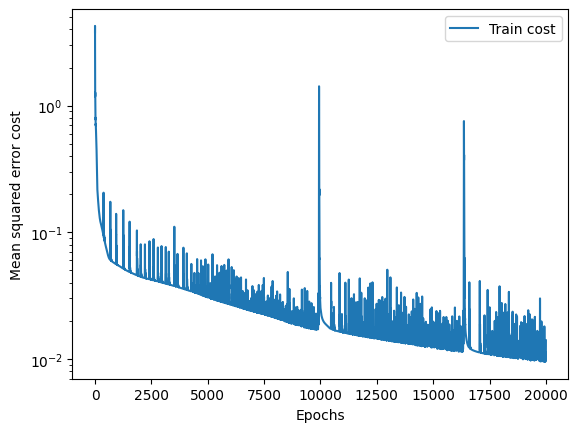

([3.798898458480835,
  4.260746002197266,
  2.9297666549682617,
  2.2760050296783447,
  2.0790979862213135,
  2.010754108428955,
  1.7169909477233887,
  1.3288158178329468,
  1.1803185939788818,
  1.2420954704284668,
  1.2702409029006958,
  1.1927671432495117,
  1.0531927347183228,
  0.910747230052948,
  0.8381924629211426,
  0.8657221794128418,
  0.9301019310951233,
  0.9544250965118408,
  0.9287582635879517,
  0.8774488568305969,
  0.8202556371688843,
  0.7809925079345703,
  0.7764089107513428,
  0.792111337184906,
  0.8033547401428223,
  0.8021588921546936,
  0.786261260509491,
  0.7541810870170593,
  0.7187933921813965,
  0.6987268924713135,
  0.6979947090148926,
  0.7078909873962402,
  0.7180476784706116,
  0.7182928323745728,
  0.7045981884002686,
  0.6855605840682983,
  0.6719700694084167,
  0.6655943393707275,
  0.6635497212409973,
  0.6629390716552734,
  0.6603617668151855,
  0.6554548740386963,
  0.6503818035125732,
  0.6440795063972473,
  0.6350744366645813,
  0.625749289989

In [131]:
# Train network
# Initialize labels for training with dummy values for u, v, p
num_points = points_domain.shape[0]
labels = torch.zeros((num_points, 3))  # [u, v, p]

PINN_CFD.fit(points_domain.detach().numpy(), labels.numpy())

After that, the results can be shown:

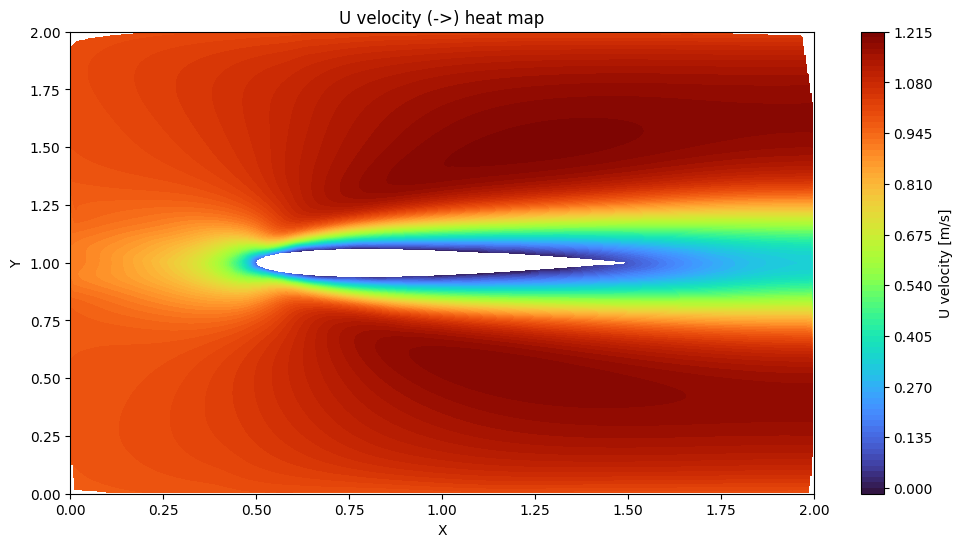

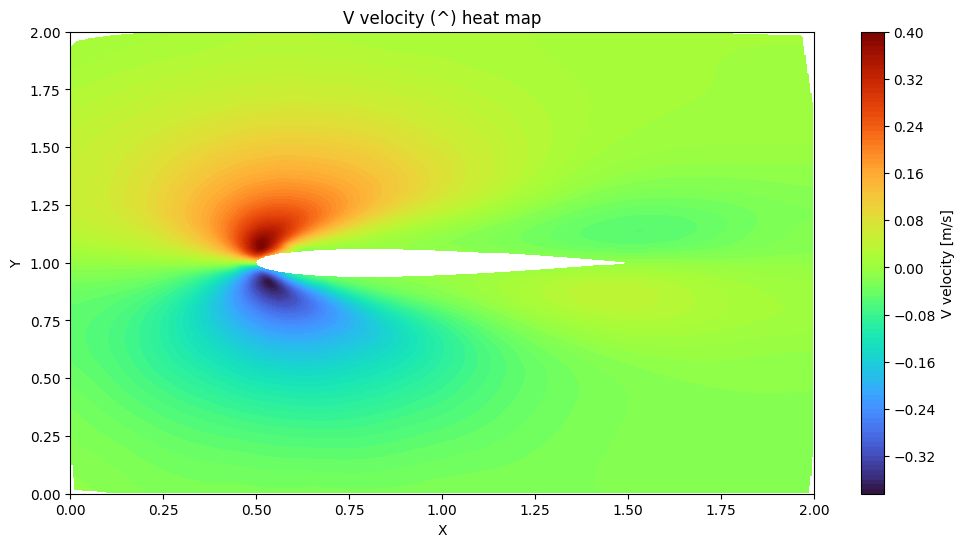

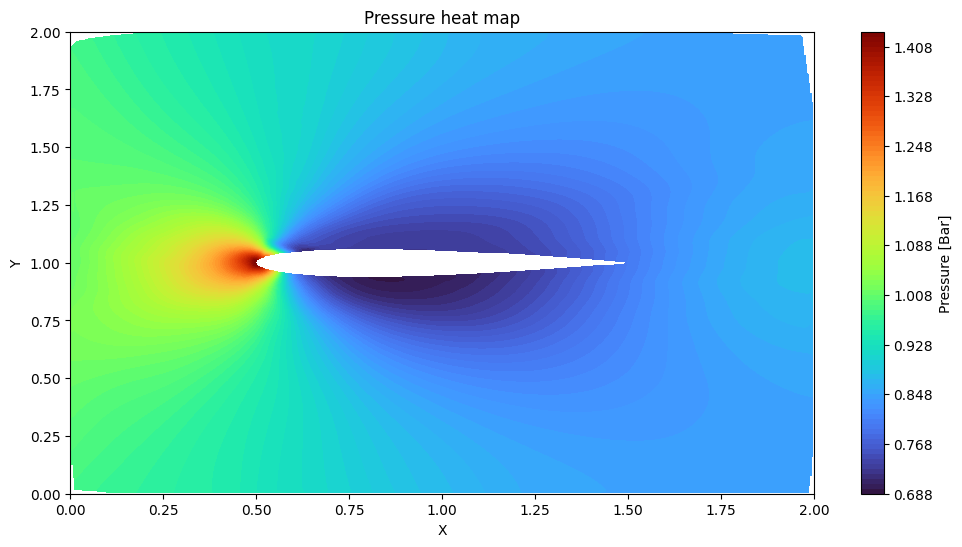

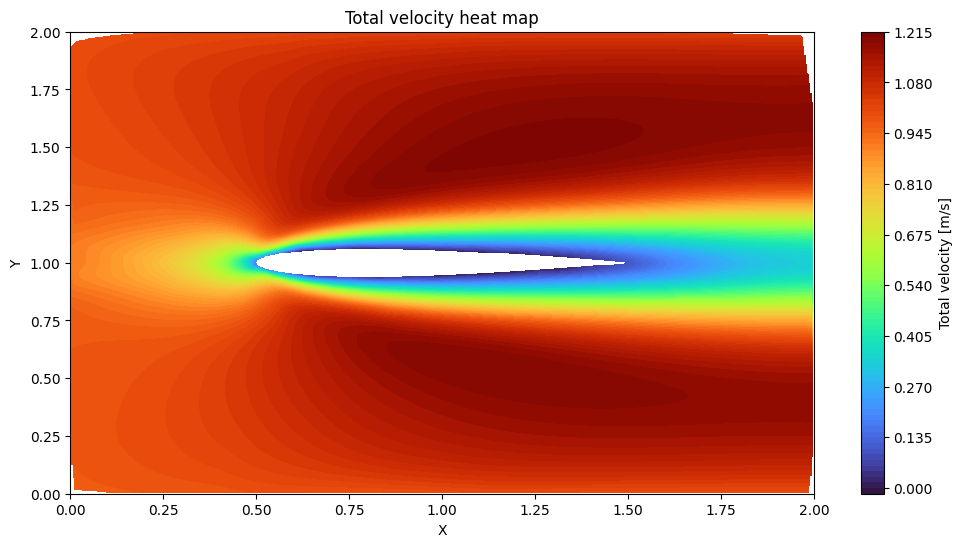

Lift force: 326.692688 [N]
Drag force: -4435.427790 [N]
Lift coefficient: 653.385375 [-]
Drag coefficient: -8870.855579 [-]


In [136]:
# Predict velocity and pressure
predictions = PINN_CFD.predict(points_domain.detach().numpy())
u, v, p = predictions[:, 0], predictions[:, 1], predictions[:, 2]

# Total velocity
phi = np.sqrt(u**2 + v**2)

# U heat map
plot_check.heat_map_generator(points_domain, u, grid_size=len(predictions), labels=["U velocity [m/s]", "U velocity (->) heat map", "X", "Y"])

# V heat map
plot_check.heat_map_generator(points_domain, v, grid_size=len(predictions), labels=["V velocity [m/s]", "V velocity (^) heat map", "X", "Y"])

# Pressure heat map
plot_check.heat_map_generator(points_domain, p, grid_size=len(predictions), labels=["Pressure [Bar]", "Pressure heat map", "X", "Y"])

# Total velocity heat map
plot_check.heat_map_generator(points_domain, phi, grid_size=len(predictions), labels=["Total velocity [m/s]", "Total velocity heat map", "X", "Y"])

# Calculate lift and drag coefficient
plot_check.lift_drag_calc(PINN_CFD, nu, rho, u_inf)

As can be seen from the figures, the PINN is able to capture the velocity profiles relatively well. However, the pressure predictions are not per definition the best, which is most likely due to the fact that the pressure is being incroporated in the momentum equation, and most lilely needs an aditional equation.

With that, this tutorial has come to an end. I hope that with this tutorial you arte now able to make your own PINNs and perform experiments within your own field! 

Thank you for taking the time to follow this tutorial and in case of any questions or doubts, feel free to contact me.

Kind regards,

Tristan Hirs